# Analyse raw tweet data
Prior to any pre-processing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../data/raw/raw_tweets_2.csv", on_bad_lines='skip')

In [6]:
df.head(-20)

,Tweets,AuthorID,CreatedAt
0,My life’s more than just basketball… because t...,23083404.0,2023-02-16 17:22:05+00:00
1,Yessir!! Congrats Young 🤴🏾Bronny!! Proud of yo...,23083404.0,2023-02-15 05:10:53+00:00
2,My brother @tkelce CONGRATS!!!!!! 💍💍🙏🏾🫡✊🏾👑,23083404.0,2023-02-13 03:27:47+00:00
3,His hand on his back had no effect on his rout...,23083404.0,2023-02-13 03:14:19+00:00
4,Sorry but I don’t like that call! Not for the ...,23083404.0,2023-02-13 03:09:15+00:00
...,...,...,...
55332,@landry_nnoko of course yeah. It s so good,416814339.0,2012-06-07 05:49:13+00:00
55333,@landry_nnoko there is a lot of sun but someti...,416814339.0,2012-06-07 05:45:53+00:00
55334,"@landry_nnoko chillin, work every day",416814339.0,2012-06-07 05:26:30+00:00
55335,"@landry_nnoko chillin, work out every day",416814339.0,2012-06-07 05:25:18+00:00


In [7]:
df.columns

Index(['Tweets', 'AuthorID', 'CreatedAt'], dtype='object')

In [8]:
df.shape

(55357, 3)

In [9]:
df.info

<bound method DataFrame.info of                                                   Tweets    AuthorID  \
0      My life’s more than just basketball… because t...  23083404.0   
1      Yessir!! Congrats Young 🤴🏾Bronny!! Proud of yo...  23083404.0   
2             My brother @tkelce CONGRATS!!!!!! 💍💍🙏🏾🫡✊🏾👑  23083404.0   
3      His hand on his back had no effect on his rout...  23083404.0   
4      Sorry but I don’t like that call! Not for the ...  23083404.0   
...                                                  ...         ...   
55352   Tourney Pick’em bracket… https://t.co/A2IlvD5gfV         NaN   
55353           Tourney Pick’em… https://t.co/R6JqIKWSWg         NaN   
55354   Tourney Pick’em bracket… https://t.co/A2IlvD5gfV         NaN   
55355           Tourney Pick’em… https://t.co/R6JqIKWSWg         NaN   
55356   Tourney Pick’em bracket… https://t.co/A2IlvD5gfV         NaN   

                       CreatedAt  
0      2023-02-16 17:22:05+00:00  
1      2023-02-15 05:10:53+00:00 

In [10]:
cat_data = (df.dtypes[df.dtypes=='object']).describe()
cat_data

count          2
unique         1
top       object
freq           2
dtype: object

In [11]:
df['AuthorID'].value_counts()

2.674251e+08    10000
3.593647e+07    10000
4.485622e+08     9133
5.081193e+07     7872
2.308340e+07     6715
4.256245e+07     6034
4.168143e+08     2337
4.601162e+08     2101
2.279776e+09     1153
2.584214e+09        2
Name: AuthorID, dtype: int64

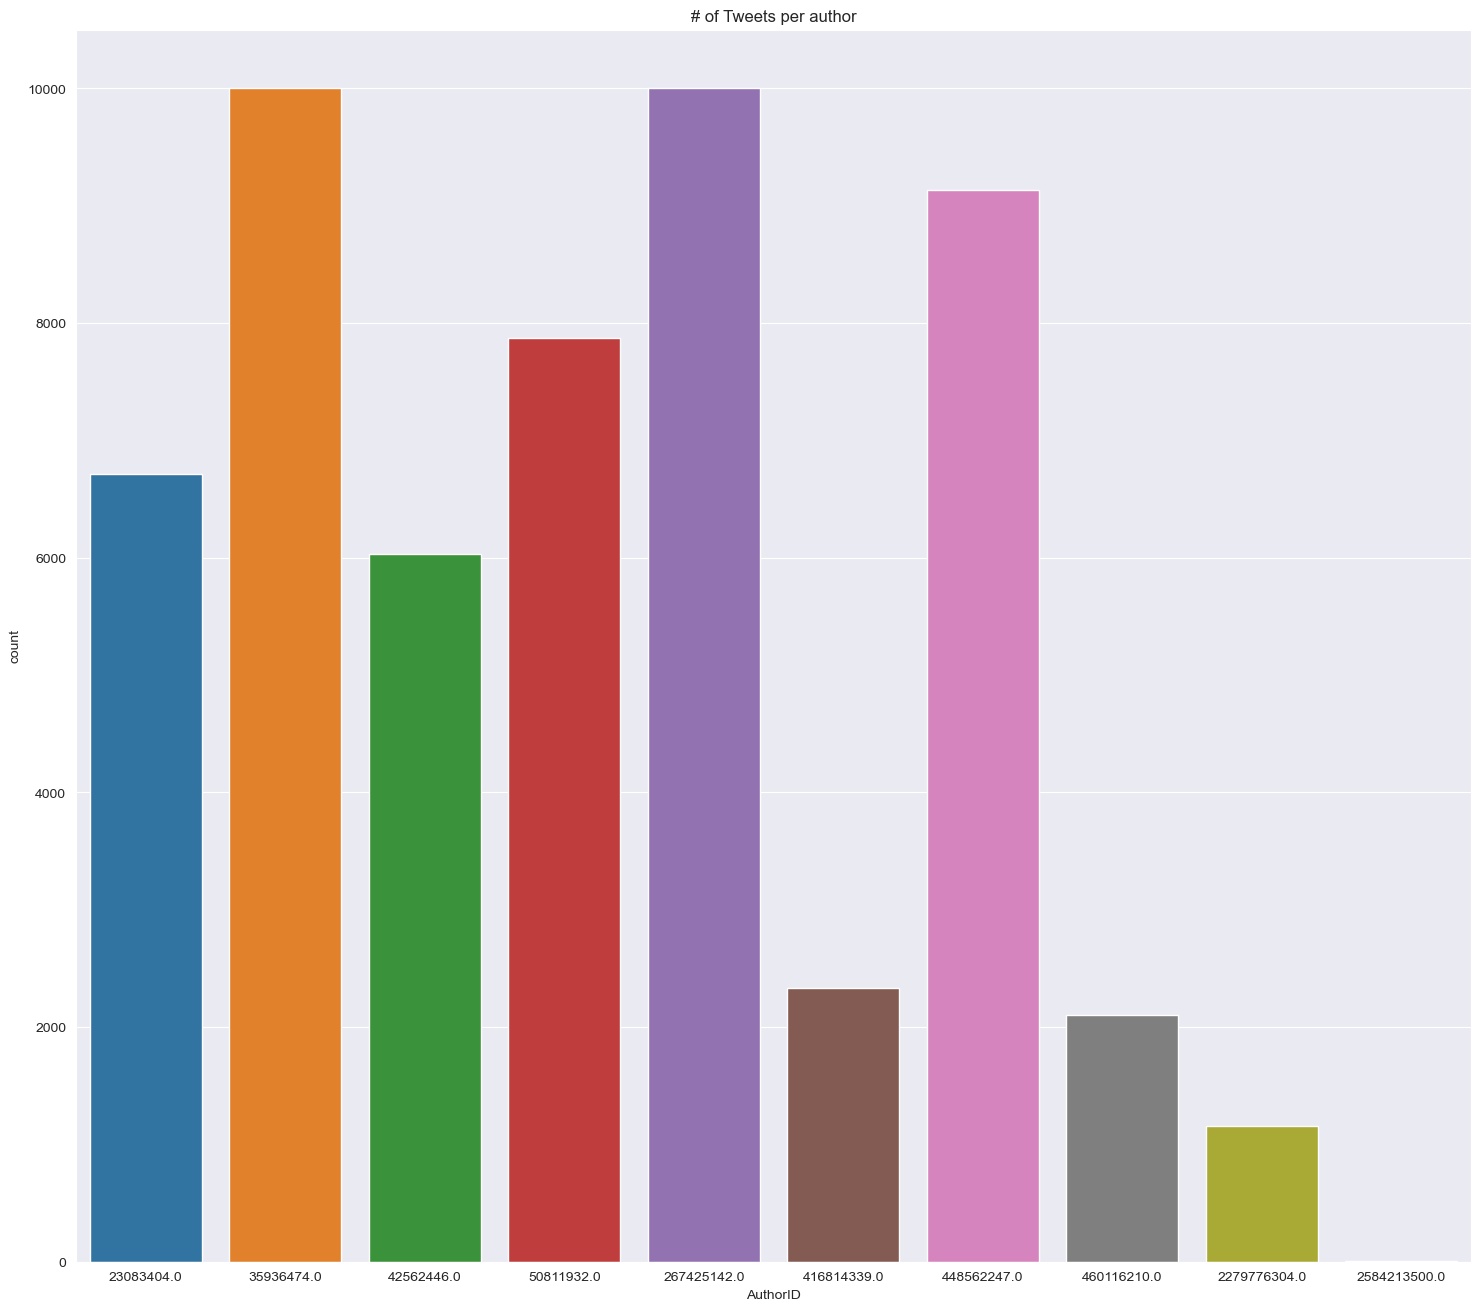

In [12]:
plt.figure(figsize=(18,16))
sns.set_style(style='darkgrid')
sns.countplot(x='AuthorID', data=df)
plt.title('# of Tweets per author')
plt.show()

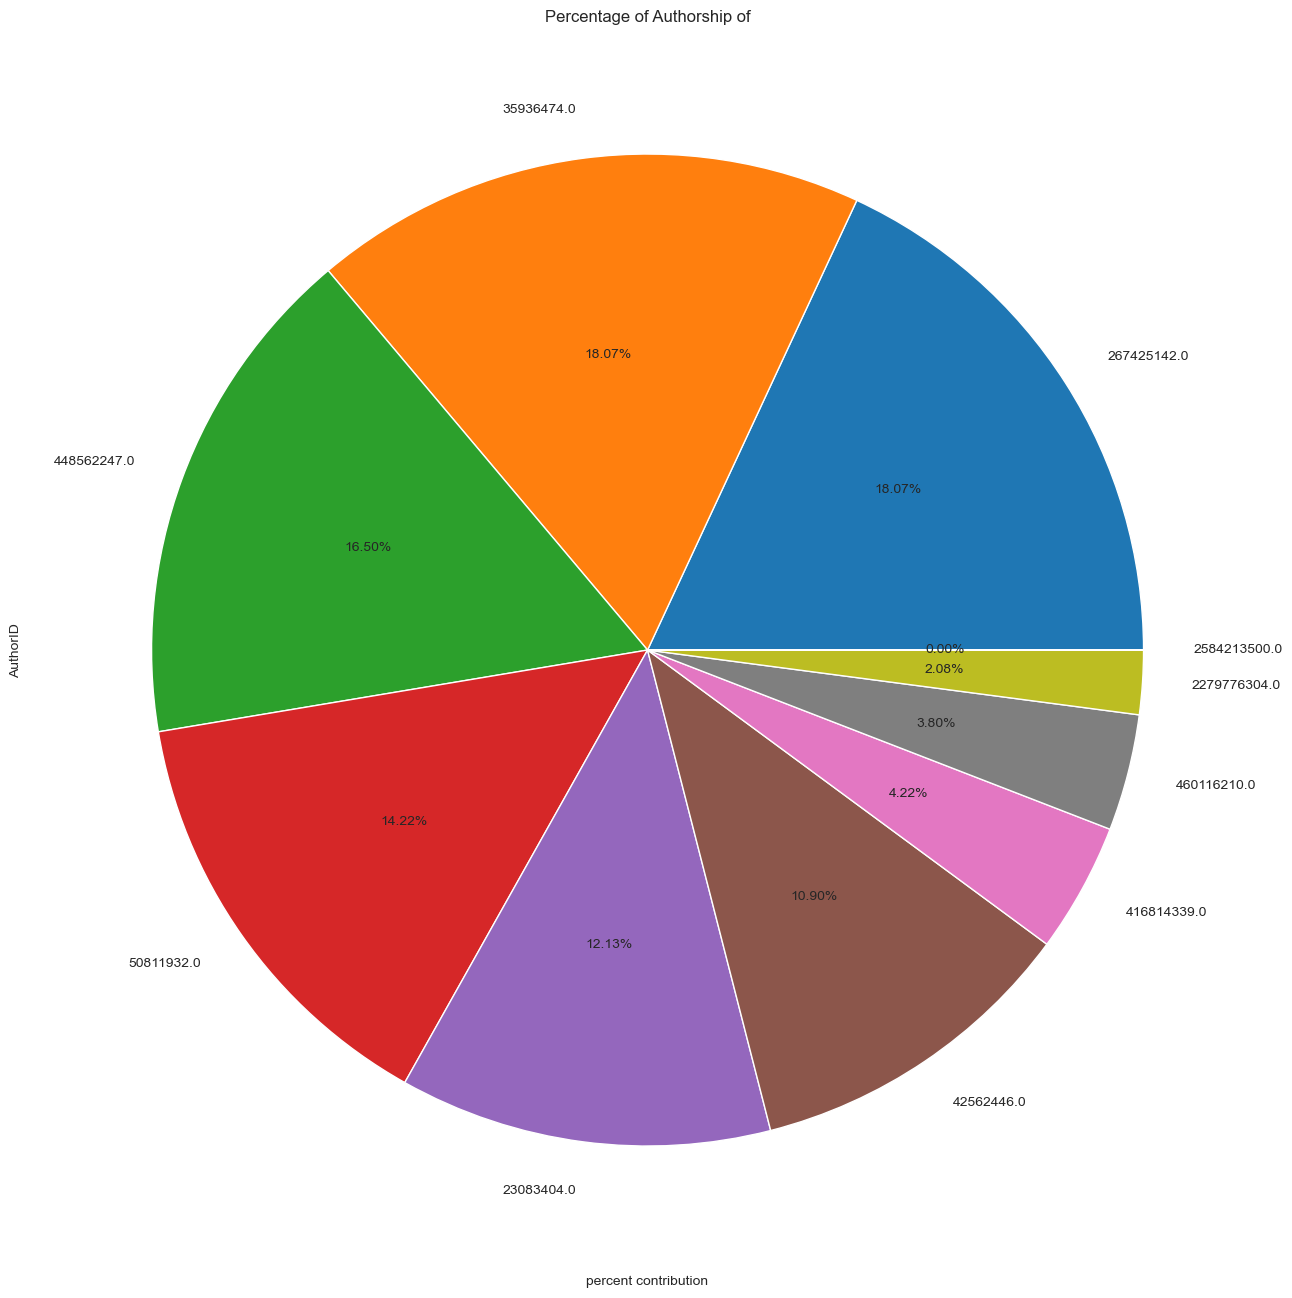

In [13]:
plt.figure(figsize=(16,18))
sns.set_style(style="darkgrid")
df['AuthorID'].value_counts().plot.pie(autopct='%0.2f%%')
plt.title("Percentage of Authorship of")
plt.xlabel("percent contribution")
plt.ylabel("AuthorID")
plt.show()

In [14]:
!pip install tweet-preprocessor
import preprocessor as p

  Using cached tweet_preprocessor-0.6.0-py3-none-any.whl (27 kB)


In [15]:
def preprocess_tweet(row):
  text = row['Tweets']
  text = p.clean(text)
  return text

In [16]:
df['CleanedTweets'] = df.apply(preprocess_tweet, axis=1)

In [17]:
df['CleanedTweets'] = df.apply(preprocess_tweet, axis=1)

In [18]:
df.head(-20)

,Tweets,AuthorID,CreatedAt,CleanedTweets
0,My life’s more than just basketball… because t...,23083404.0,2023-02-16 17:22:05+00:00,My lifes more than just basketball because the...
1,Yessir!! Congrats Young 🤴🏾Bronny!! Proud of yo...,23083404.0,2023-02-15 05:10:53+00:00,Yessir!! Congrats Young Bronny!! Proud of you ...
2,My brother @tkelce CONGRATS!!!!!! 💍💍🙏🏾🫡✊🏾👑,23083404.0,2023-02-13 03:27:47+00:00,My brother CONGRATS!!!!!!
3,His hand on his back had no effect on his rout...,23083404.0,2023-02-13 03:14:19+00:00,His hand on his back had no effect on his rout...
4,Sorry but I don’t like that call! Not for the ...,23083404.0,2023-02-13 03:09:15+00:00,Sorry but I dont like that call! Not for the S...
...,...,...,...,...
55332,@landry_nnoko of course yeah. It s so good,416814339.0,2012-06-07 05:49:13+00:00,of course yeah. It s so good
55333,@landry_nnoko there is a lot of sun but someti...,416814339.0,2012-06-07 05:45:53+00:00,there is a lot of sun but sometimes it s cold
55334,"@landry_nnoko chillin, work every day",416814339.0,2012-06-07 05:26:30+00:00,"chillin, work every day"
55335,"@landry_nnoko chillin, work out every day",416814339.0,2012-06-07 05:25:18+00:00,"chillin, work out every day"


In [19]:
df['pre_clean_len'] = [len(t) for t in df.Tweets]

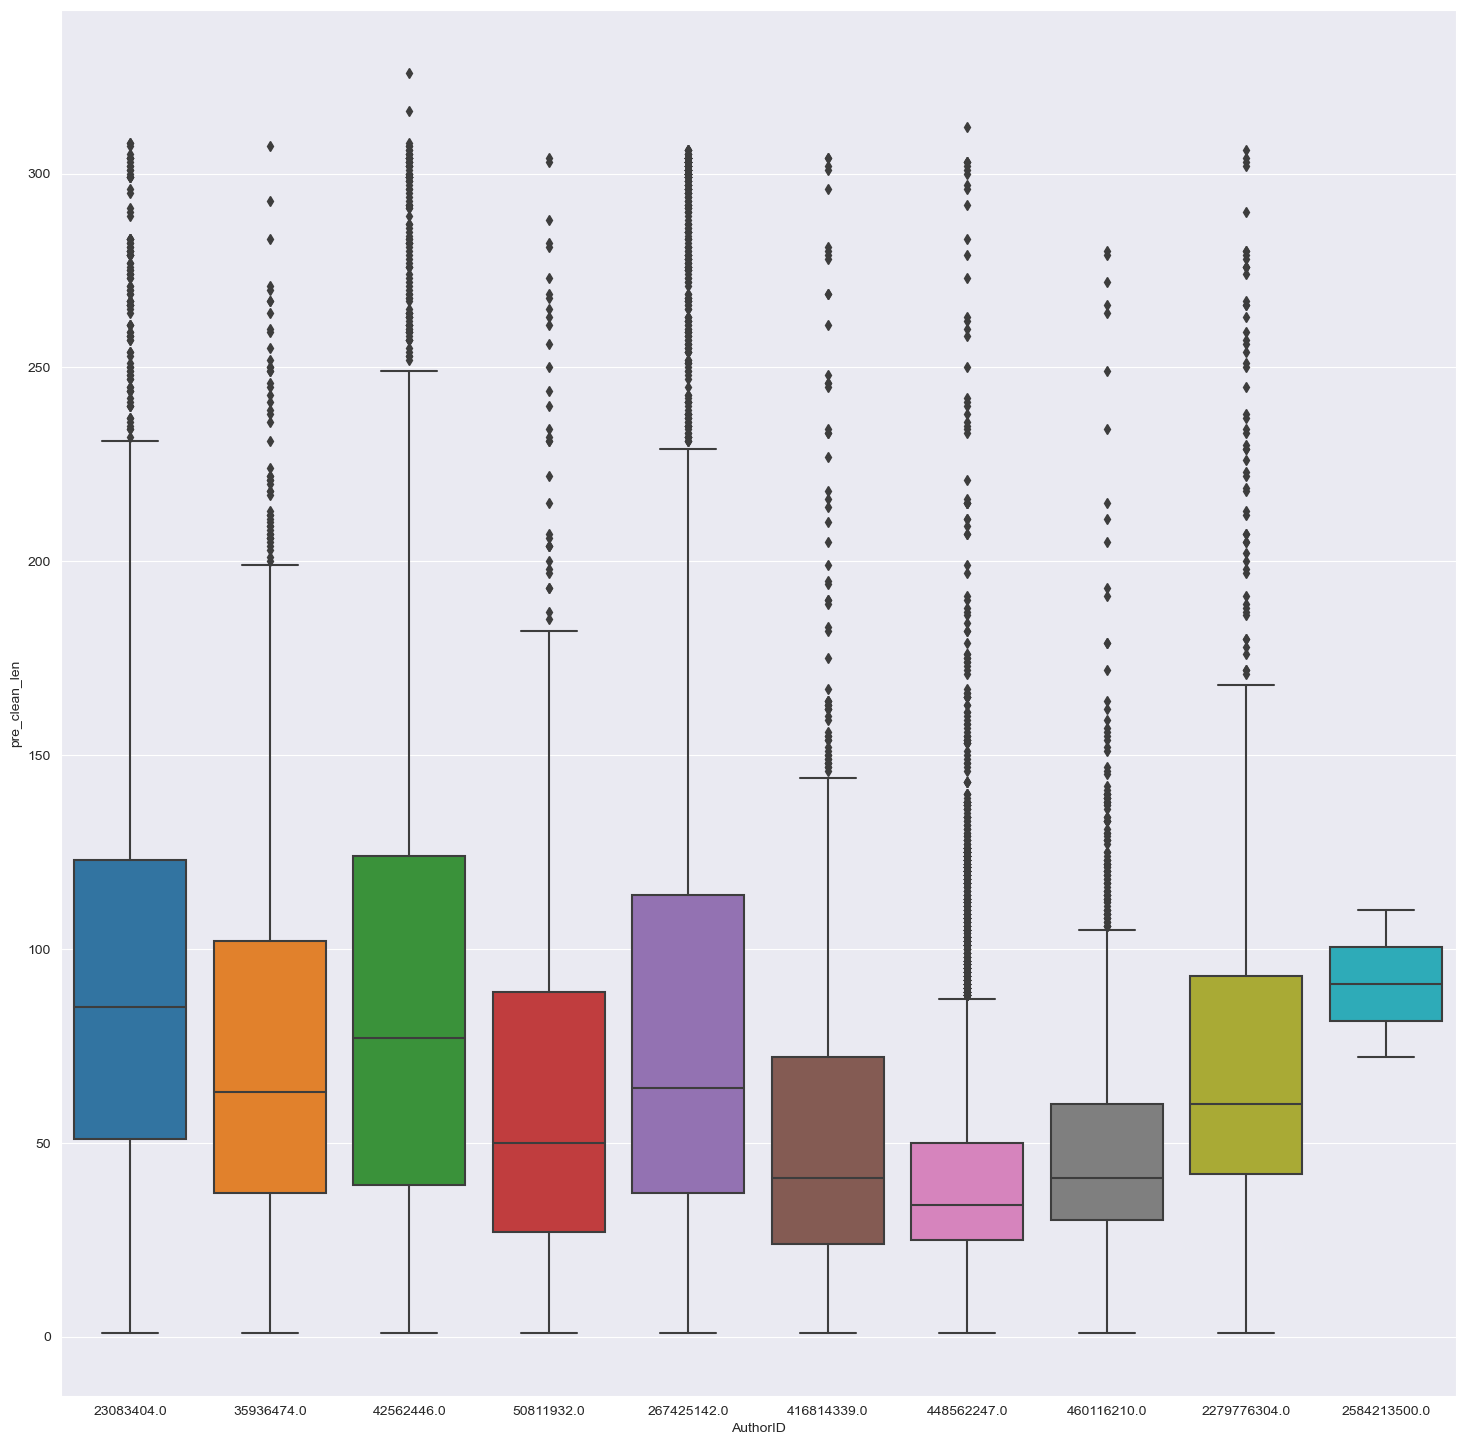

In [20]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.boxplot(x=df['AuthorID'],y=df['pre_clean_len'])
plt.show()